In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
%matplotlib inline

In [2]:
cat4 = cv2.imread('CATS_DOGS/CATS_DOGS/train/CAT/4.jpg')

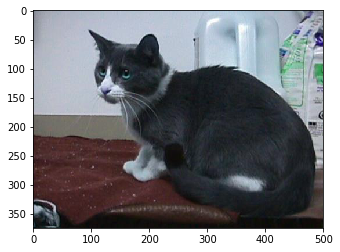

In [3]:
plt.imshow(cat4)

In [4]:
cat4.shape

(375, 500, 3)

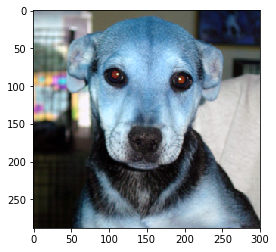

In [5]:
dog = cv2.imread('CATS_DOGS/CATS_DOGS/train/DOG/4.jpg')
plt.imshow(dog)

In [23]:
dog.shape

(288, 300, 3)

In [7]:
from keras.preprocessing.image import ImageDataGenerator #creating fluctuation from orginal dataset

Using TensorFlow backend.


In [8]:
Image_gen = ImageDataGenerator(rotation_range = 30,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               rescale = 1/255,shear_range = 0.2,
                               zoom_range = 0.2,horizontal_flip= True,
                               fill_mode = 'nearest')

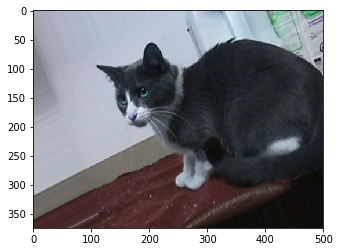

In [10]:
plt.imshow(Image_gen.random_transform(cat4))

In [11]:
Image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [ ]:
############################################################
#TIME TO BUILD A FUCKING MODEL 

In [17]:
from keras.models import Sequential

In [18]:
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [133]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(150*150,)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

In [134]:
model.compile(loss ='binary_crossentropy',optimizer ='adam',metrics = ['accuracy'])

In [135]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 512)               11520512  
_________________________________________________________________
dropout_31 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_32 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 257       
Total params: 11,652,097
Trainable params: 11,652,097
Non-trainable params: 0
_________________________________________________________________


In [136]:
batch_size = 16
train_image_gen = Image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/train',target_size=(150*150,),
                                               batch_size = batch_size, class_mode ='binary')

Found 18743 images belonging to 2 classes.


In [137]:
test_image_gen = Image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/test',target_size=(150*150,),
                                               batch_size = batch_size, class_mode ='binary')

Found 6251 images belonging to 2 classes.


In [123]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [138]:
results = model.fit_generator(train_image_gen,
                              epochs=1,
                              steps_per_epoch=150,
                              validation_data = test_image_gen,
                              validation_steps = 12) 
#step size = 16, 150 steps per epoch means only train on 2400 pics

Epoch 1/1


IndexError: tuple index out of range